### Trabalho Final De Estatística Aplicada

#### Diário de Análises

Colocar a análise abaixo

### Bibliotecas

In [451]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, normaltest, probplot, chi2_contingency
import warnings

### Lendo a base

In [452]:
##df = pd.read_csv('C:\\GitHub\\Applied Statistics\\PESQUISA-DSA29.csv', sep = ',', encoding = 'utf-8')
df = pd.read_excel('C:\\GitHub\\Applied Statistics\\PESQUISA-DSA29.xlsx')

# Ajuste e tratamentos novos

In [453]:
df= df.drop(["Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
df = df.dropna()

df['pesquisador (aluno)'] = df['pesquisador (aluno)'].astype('str')
df['pesq_id'] =  df['pesq_id'].astype('int64')
df['idade'] =  df['idade'].astype('int64')
df['sexo'] = df['sexo'].astype(str)
df['peso'] =  df['peso'].astype('int64')
df['altura'] =  df['altura'].astype('int64')
df['estado_civil'] =  df['estado_civil'].astype('int64')
df['escolaridade'] =  df['escolaridade'].astype('int64')
df['consumo_alcool'] =  df['consumo_alcool'].astype('int64')
df['fumante'] =  df['fumante'].astype('int64')
df['exercícios'] =  df['exercícios'].astype('int64')
df['dieta'] =  df['dieta'].astype('int64')

df['sexo'] = df['sexo'].map(str.strip)
df.head(500)

,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,Murilo Santone de Menezes,1,3479030,26,M,67,183,1,5,3,1,3,1
1,Murilo Santone de Menezes,1,3479030,42,F,65,173,2,4,4,4,1,1
2,Murilo Santone de Menezes,1,3479030,61,M,67,178,2,1,3,4,4,1
3,Murilo Santone de Menezes,1,3479030,86,F,60,165,3,1,6,4,4,1
4,Murilo Santone de Menezes,1,3479030,24,F,70,170,1,2,2,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,Felipe Vinicius Torres,33,50010000,19,F,68,170,1,2,4,4,2,1
364,Felipe Vinicius Torres,33,71510010,38,M,95,185,2,4,2,1,2,4
365,Felipe Vinicius Torres,33,94010450,43,F,70,168,3,2,5,4,4,1
366,Felipe Vinicius Torres,33,60710020,26,M,82,178,1,2,1,2,2,2


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 367
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pesquisador (aluno)  368 non-null    object
 1   pesq_id              368 non-null    int64 
 2   cep                  368 non-null    object
 3   idade                368 non-null    int64 
 4   sexo                 368 non-null    object
 5   peso                 368 non-null    int64 
 6   altura               368 non-null    int64 
 7   estado_civil         368 non-null    int64 
 8   escolaridade         368 non-null    int64 
 9   consumo_alcool       368 non-null    int64 
 10  fumante              368 non-null    int64 
 11  exercícios           368 non-null    int64 
 12  dieta                368 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 40.2+ KB


In [455]:
df_analise = df.iloc[:, 3:13]
df_analise

,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,26,M,67,183,1,5,3,1,3,1
1,42,F,65,173,2,4,4,4,1,1
2,61,M,67,178,2,1,3,4,4,1
3,86,F,60,165,3,1,6,4,4,1
4,24,F,70,170,1,2,2,2,4,1
...,...,...,...,...,...,...,...,...,...,...
363,19,F,68,170,1,2,4,4,2,1
364,38,M,95,185,2,4,2,1,2,4
365,43,F,70,168,3,2,5,4,4,1
366,26,M,82,178,1,2,1,2,2,2


In [456]:
# Validando valores nulos
df.isnull().sum()

pesquisador (aluno)    0
pesq_id                0
cep                    0
idade                  0
sexo                   0
peso                   0
altura                 0
estado_civil           0
escolaridade           0
consumo_alcool         0
fumante                0
exercícios             0
dieta                  0
dtype: int64

In [457]:
### Separando o dataframe por sexo
df_masculino = df[df['sexo'] == 'M']
df_feminino = df[df['sexo'] == 'F']

In [458]:
### Deixando somente os dados que quantitativos por sexo
df_masculino2 = df_masculino.iloc[:, 3:13]
df_feminino2 = df_feminino.iloc[:, 3:13]

#### Analisando a média, desvio padrão e intervalo de confiança para os dados quantitativos

Dados Quantitativos:
- Peso
- Altura
- Idade

In [459]:
df.head(1)

,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,Murilo Santone de Menezes,1,3479030,26,M,67,183,1,5,3,1,3,1


In [460]:
# Média Peso
media_peso_masculino = sum(df_masculino2['peso'])/len(df_masculino2['peso'])
media_peso_feminino = sum(df_feminino2['peso'])/len(df_feminino2['peso'])

# Média Altura
media_altura_masculino = sum(df_masculino2['altura'])/len(df_masculino2['altura'])
media_altura_feminino = sum(df_feminino2['altura'])/len(df_feminino2['altura'])

# Média Idade
media_idade_masculino = sum(df_masculino2['idade'])/len(df_masculino2['idade'])
media_idade_feminino = sum(df_feminino2['idade'])/len(df_feminino2['idade'])


# Resultado
print(f'A média do peso masculino é: {media_peso_masculino:.2f}')
print(f'A média do peso feminino é: {media_peso_feminino:.2f}')
print(f'A média da altura masculina é: {media_altura_masculino:.2f}')
print(f'A média da altura feminina é: {media_altura_feminino:.2f}')
print(f'A média de idade masculina é: {media_idade_masculino:.2f}')
print(f'A média de idade feminina é: {media_idade_feminino:.2f}')

A média do peso masculino é: 83.48
A média do peso feminino é: 67.55
A média da altura masculina é: 172.02
A média da altura feminina é: 157.44
A média de idade masculina é: 35.43
A média de idade feminina é: 38.01


In [462]:
# Desvio Padrão Peso
desvio_padrao_peso_masculino = np.std(df_masculino2['peso'])
desvio_padrao_peso_feminino = np.std(df_feminino2['peso'])

# Desvio Padrão Altura
desvio_padrao_altura_masculino = np.std(df_masculino2['altura'])
desvio_padrao_altura_feminino = np.std(df_feminino2['altura'])

# Desvio Padrão Idade
desvio_padrao_idade_masculino = np.std(df_masculino2['idade'])
desvio_padrao_idade_feminino = np.std(df_feminino2['idade'])


# Resultado

print(f'O desvio padrão do peso masculino é: {desvio_padrao_peso_masculino:.2f}')
print(f'O desvio padrão do peso feminino é: {desvio_padrao_peso_feminino:.2f}')
print(f'O desvio padrão da altura masculina é: {desvio_padrao_altura_masculino:.2f}')
print(f'O desvio padrão da altura feminina é: {desvio_padrao_altura_feminino:.2f}')
print(f'O desvio padrão da idade masculina é: {desvio_padrao_idade_masculino:.2f}')
print(f'O desvio padrão da idade feminina é: {desvio_padrao_idade_feminino:.2f}')

O desvio padrão do peso masculino é: 15.44
O desvio padrão do peso feminino é: 14.19
O desvio padrão da altura masculina é: 27.09
O desvio padrão da altura feminina é: 31.09
O desvio padrão da idade masculina é: 13.91
O desvio padrão da idade feminina é: 17.28


In [463]:
# Selecionar as variáveis quantitativas
quantitativas = ['idade', 'peso', 'altura']

In [464]:
# Função para calcular intervalo de confiança
def intervalo_confianca(series, confianca=0.95):
    n = len(series.dropna())  # Contar valores não nulos
    media = np.mean(series)
    desvio_padrao = np.std(series, ddof=1)  # ddof=1 para amostra
    erro_padrao = desvio_padrao / np.sqrt(n)

    # Determinar se usamos z ou t
    if n > 30:
        valor_critico = norm.ppf((1 + confianca) / 2)  # z-score
    else:
        valor_critico = t.ppf((1 + confianca) / 2, df=n-1)  # t-score

    # Calcular os limites
    limite_inferior = media - valor_critico * erro_padrao
    limite_superior = media + valor_critico * erro_padrao

    return limite_inferior, limite_superior

In [465]:
confianca = 0.95

In [100]:
# Calcular intervalo de confiança para cada variável
resultados = {}
for coluna in quantitativas:
    limite_inferior, limite_superior = intervalo_confianca(df_masculino2[coluna], confianca)
    resultados[coluna] = (limite_inferior, limite_superior)

# Exibir resultados
print("Intervalo de Confiança do sexo Masculino por Variável:")
for coluna, (inf, sup) in resultados.items():
    print(f"{coluna.capitalize()}: Limite Inferor: {inf:.2f}, Limite Superior: {sup:.2f}")

Intervalo de Confiança do sexo Masculino por Variável:
Idade: Limite Inferor: 33.48, Limite Superior: 37.54
Peso: Limite Inferor: 81.42, Limite Superior: 86.71
Altura: Limite Inferor: 167.04, Limite Superior: 175.17


In [466]:
# Calcular intervalo de confiança para cada variável
resultados = {}
for coluna in quantitativas:
    limite_inferior, limite_superior = intervalo_confianca(df_feminino2[coluna], confianca)
    resultados[coluna] = (limite_inferior, limite_superior)

# Exibir resultados
print("Intervalo de Confiança do sexo Feminino por Variável:")
for coluna, (inf, sup) in resultados.items():
    print(f"{coluna.capitalize()}: Limite Inferor: {inf:.2f}, Limite Superior: {sup:.2f}")

Intervalo de Confiança do sexo Feminino por Variável:
Idade: Limite Inferor: 35.48, Limite Superior: 40.54
Peso: Limite Inferor: 65.47, Limite Superior: 69.63
Altura: Limite Inferor: 152.88, Limite Superior: 161.99


### Teste de Normalidade

Resultados dos Testes de Normalidade Masculino:

Variável: idade
  Shapiro-Wilk: Estatística = 0.9115, p-valor = 0.0000

Variável: peso
  Shapiro-Wilk: Estatística = 0.9870, p-valor = 0.0843

Variável: altura
  Shapiro-Wilk: Estatística = 0.3957, p-valor = 0.0000


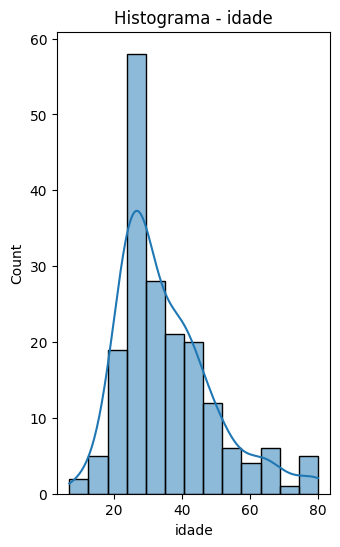

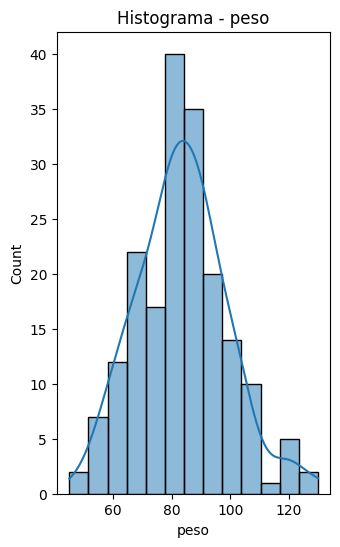

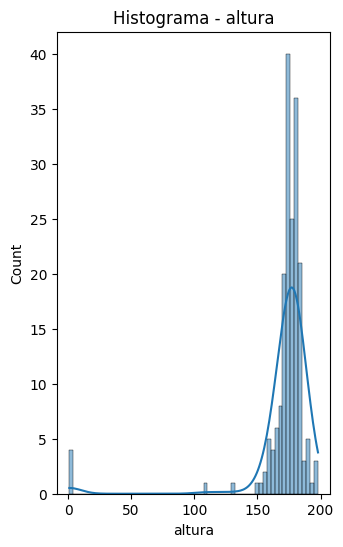

In [467]:
# Analise de normalidade do sexo Masculino

for coluna in quantitativas:
    serie = df_masculino2[coluna].dropna()  # Remover valores nulos

    # Teste Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(serie)

    # Teste D’Agostino e Pearson (Normaltest)
    stat_normal, p_normal = normaltest(serie)

    # Adicionar resultados
    resultados[coluna] = {
        'Shapiro-Wilk': {'estatística': stat_shapiro, 'p-valor': p_shapiro},
    }

    # Visualizações
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 3, 1)
    sns.histplot(serie, kde=True)
    plt.title(f"Histograma - {coluna}")

# Exibir resultados
print("Resultados dos Testes de Normalidade Masculino:")
for coluna, teste in resultados.items():
    print(f"\nVariável: {coluna}")
    for nome, valores in teste.items():
        print(f"  {nome}: Estatística = {valores['estatística']:.4f}, p-valor = {valores['p-valor']:.4f}")

Resultados dos Testes de Normalidade Masculino:

Variável: idade
  Shapiro-Wilk: Estatística = 0.9277, p-valor = 0.0000

Variável: peso
  Shapiro-Wilk: Estatística = 0.9324, p-valor = 0.0000

Variável: altura
  Shapiro-Wilk: Estatística = 0.4304, p-valor = 0.0000


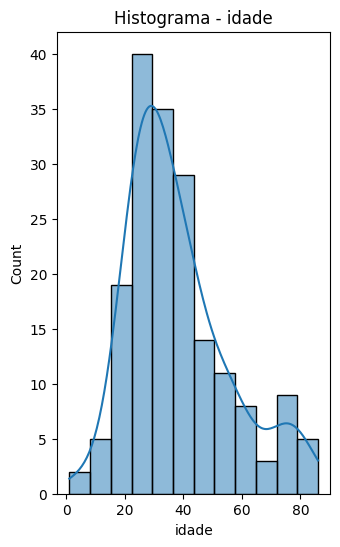

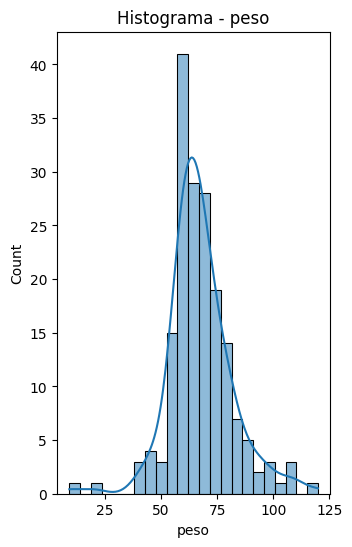

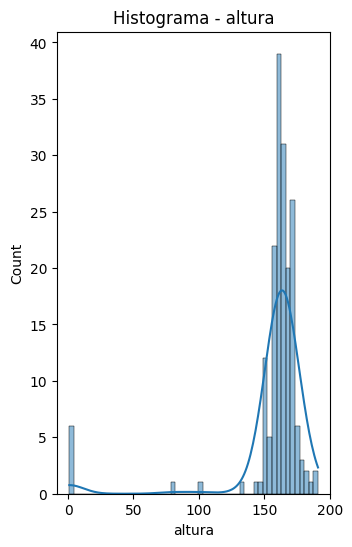

In [468]:
# Analise de normalidade do sexo feminino

for coluna in quantitativas:
    serie = df_feminino2[coluna].dropna()  # Remover valores nulos

    # Teste Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(serie)

    # Teste D’Agostino e Pearson (Normaltest)
    stat_normal, p_normal = normaltest(serie)

    # Adicionar resultados
    resultados[coluna] = {
        'Shapiro-Wilk': {'estatística': stat_shapiro, 'p-valor': p_shapiro},
    }

    # Visualizações
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 3, 1)
    sns.histplot(serie, kde=True)
    plt.title(f"Histograma - {coluna}")

# Exibir resultados
print("Resultados dos Testes de Normalidade Masculino:")
for coluna, teste in resultados.items():
    print(f"\nVariável: {coluna}")
    for nome, valores in teste.items():
        print(f"  {nome}: Estatística = {valores['estatística']:.4f}, p-valor = {valores['p-valor']:.4f}")

#### Conclusão

Os três testes de normalidade (para idade, peso e altura) indicam que os dados não seguem uma distribuição normal. O p-valor de 0.0000 em todos os casos é suficientemente baixo para rejeitar a hipótese de normalidade com um alto nível de confiança.

### Testes de Independência

In [469]:
# Variáveis de interesse

atributos = ['consumo_alcool', 'fumante', 'exercícios', 'dieta']

In [470]:
# Realizar o teste de qui-quadrado para cada variável
for atributo in atributos:
    # Criar tabela de contingência
    tabela_contingencia = pd.crosstab(df['sexo'], df[atributo])
    
    # Aplicar o teste qui-quadrado
    chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)
    
    # Mostrar os resultados
    print(f"Teste de independência entre sexo e {atributo}:")
    print(f"p-valor: {p_valor:.4f}")
    if p_valor < 0.05:
        print("Resultado: Existe uma associação significativa entre sexo e", atributo)
    else:
        print("Resultado: Não existe uma associação significativa entre sexo e", atributo)
    print("-" * 50)

Teste de independência entre sexo e consumo_alcool:
p-valor: 0.0354
Resultado: Existe uma associação significativa entre sexo e consumo_alcool
--------------------------------------------------
Teste de independência entre sexo e fumante:
p-valor: 0.2846
Resultado: Não existe uma associação significativa entre sexo e fumante
--------------------------------------------------
Teste de independência entre sexo e exercícios:
p-valor: 0.3316
Resultado: Não existe uma associação significativa entre sexo e exercícios
--------------------------------------------------
Teste de independência entre sexo e dieta:
p-valor: 0.0102
Resultado: Existe uma associação significativa entre sexo e dieta
--------------------------------------------------


#### Conclusão

* Consumo de Álcool e Dieta apresentaram uma associação significativa com o sexo, indicando que o comportamento em relação a essas variáveis pode ser diferente entre homens e mulheres.
* Fumante e Exercícios não mostraram uma associação significativa com o sexo, sugerindo que, na amostra, esses comportamentos são mais independentes do sexo.

### Teste de Homogeneídade

In [471]:
# Variáveis categóricas para análise de homogeneidade

categorias = ['estado_civil', 'escolaridade', 'consumo_alcool', 'fumante', 'exercícios', 'dieta']

In [472]:
# Realizar o teste de qui-quadrado de homogeneidade
for categoria in categorias:
    # Criar a tabela de contingência para a variável com a separação por sexo
    tabela_contingencia = pd.crosstab(df['sexo'], df[categoria])
    
    # Aplicar o teste qui-quadrado de homogeneidade
    chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)
    
    # Exibir os resultados
    print(f"Teste de homogeneidade entre sexo e {categoria}:")
    print(f"p-valor: {p_valor:.4f}")
    if p_valor < 0.05:
        print(f"Resultado: Não existe homogeneidade entre as distribuições de {categoria} por sexo.")
    else:
        print(f"Resultado: Existe homogeneidade entre as distribuições de {categoria} por sexo.")
    print("-" * 50)

Teste de homogeneidade entre sexo e estado_civil:
p-valor: 0.0006
Resultado: Não existe homogeneidade entre as distribuições de estado_civil por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e escolaridade:
p-valor: 0.8631
Resultado: Existe homogeneidade entre as distribuições de escolaridade por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e consumo_alcool:
p-valor: 0.0354
Resultado: Não existe homogeneidade entre as distribuições de consumo_alcool por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e fumante:
p-valor: 0.2846
Resultado: Existe homogeneidade entre as distribuições de fumante por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e exercícios:
p-valor: 0.3316
Resultado: Existe homogeneidade entre as distribuições de exercícios por sexo.
--------------------------------------------------
Teste de hom

#### Conclusão

A análise de homogeneidade revelou que:
* Estado Civil, Consumo de Álcool e Dieta apresentam distribuições significativamente diferentes entre homens e mulheres, indicando falta de homogeneidade.
* Escolaridade, Fumante e Exercícios têm distribuições semelhantes entre os grupos de sexo, indicando homogeneidade.

### Criando Dataset *Homogêneo* a partir de uma variável categórica

In [473]:
# Calcular as proporções globais da variável "dieta"
proporcoes_globais = df['dieta'].value_counts(normalize=True)
print("Proporções globais de dieta:")
print(proporcoes_globais)

# Criar um dataset homogêneo
df_homogeneo = pd.DataFrame()

for sexo in df['sexo'].unique():
    grupo = df[df['sexo'] == sexo]
    
    # Redistribuir as categorias de "dieta" conforme as proporções globais
    for categoria, proporcao in proporcoes_globais.items():
        n_amostras = int(proporcao * len(grupo))
        amostra = grupo[grupo['dieta'] == categoria].sample(n=n_amostras, replace=True, random_state=42)
        df_homogeneo = pd.concat([df_homogeneo, amostra])

Proporções globais de dieta:
dieta
1    0.706522
4    0.163043
2    0.078804
3    0.051630
Name: proportion, dtype: float64


In [474]:
df_homogeneo

,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
235,Giovanni Petruitis Cantagesso,20,3515110,40,M,99,184,2,4,1,4,2,1
222,Gabriel Padula da Silva,19,9241480,50,M,60,177,1,2,6,4,3,1
51,Carlos Menezes de Oliveira,5,49480000,32,M,90,175,1,1,4,4,4,1
243,Carlos Augusto Reis,21,6730000,35,M,80,174,4,4,6,4,4,1
176,Lenon Alcântara Machado,15,7500000,32,M,74,179,1,5,4,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Grasiely Lima Pastori Vieira,30,67890123,24,F,64,162,1,3,3,4,2,3
357,Ryan de Oliveira Queiroz,32,2543000,77,F,79,176,1,3,4,4,1,3
142,Douglas Cardoso dos Santos,11,60694-170,31,F,60,167,2,4,4,4,4,3
333,Grasiely Lima Pastori Vieira,30,67890123,24,F,64,162,1,3,3,4,2,3
